2024-07-24 22:49:52.716612: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-24 22:49:54.218188: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 22:49:55.884746: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-24 22:49:57.929011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://g

Epoch 1/20


I0000 00:00:1721861412.799426   20876 service.cc:145] XLA service 0x7f7998159c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721861412.799463   20876 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-07-24 22:50:12.824813: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-24 22:50:12.875070: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721861412.961590   20876 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7682/7682 [==============================] - 34s 3ms/step - loss: 0.6280 - accuracy: 0.9995 - val_loss: 0.0710 - val_accuracy: 1.0000
Epoch 2/20
7682/7682 [==============================] - 20s 3ms/step - loss: 0.0712 - accuracy: 0.9999 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 3/20
7682/7682 [==============================] - 20s 3ms/step - loss: 0.0478 - accuracy: 0.9999 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 4/20
7682/7682 [==============================] - 20s 3ms/step - loss: 0.0210 - accuracy: 0.9999 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 5/20
7682/7682 [==============================] - 20s 3ms/step - loss: 0.0123 - accuracy: 0.9999 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/20
7682/7682 [==============================] - 19s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7/20
7682/7682 [==============================] - 20s 3ms/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 0.0032 - val_accuracy: 1.0

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


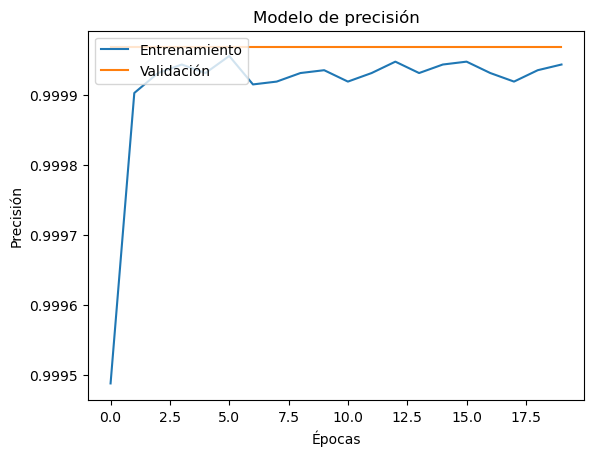

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el conjunto de datos de entrenamiento
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])  # Reemplaza 'target_column' con el nombre real de la columna objetivo
y = variaciones_final['etiqueta']  # Reemplaza 'target_column' con el nombre real de la columna objetivo

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Capa de entrada
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(Dense(64, activation='relu'))  # Capa oculta
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida (para clasificación binaria; cambia a 'softmax' para multiclase)

# Compilar el modelo
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy',  # Cambia a 'categorical_crossentropy' para clasificación multiclase
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    epochs=20,  # Número de épocas; ajusta según sea necesario
                    batch_size=32,  # Tamaño del batch; ajusta según sea necesario
                    validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/modelo_entrenado.h5')

# Opcional: Guardar el historial de entrenamiento para análisis posterior
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.savefig('/home/ec2-user/SageMaker/segundo intento/final2/historial_entrenamiento.png')
plt.show()


Epoch 1/20
6146/6146 [==============================] - 15s 2ms/step - loss: 2139.1641 - accuracy: 0.9420 - val_loss: 495.4808 - val_accuracy: 0.7285
Epoch 2/20
6146/6146 [==============================] - 14s 2ms/step - loss: 6831.7100 - accuracy: 0.8502 - val_loss: 5891.7144 - val_accuracy: 0.5071
Epoch 3/20
6146/6146 [==============================] - 14s 2ms/step - loss: 10252.4863 - accuracy: 0.7400 - val_loss: 0.0800 - val_accuracy: 0.9975
Epoch 4/20
6146/6146 [==============================] - 14s 2ms/step - loss: 10092.8145 - accuracy: 0.8562 - val_loss: 3517.5425 - val_accuracy: 0.6492
Epoch 5/20
6146/6146 [==============================] - 14s 2ms/step - loss: 9112.5117 - accuracy: 0.7939 - val_loss: 2.9891 - val_accuracy: 0.9724
Epoch 6/20
6146/6146 [==============================] - 14s 2ms/step - loss: 18434.6895 - accuracy: 0.7591 - val_loss: 2836.9971 - val_accuracy: 0.7567
Epoch 7/20
6146/6146 [==============================] - 14s 2ms/step - loss: 39224.6172 - accuracy

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


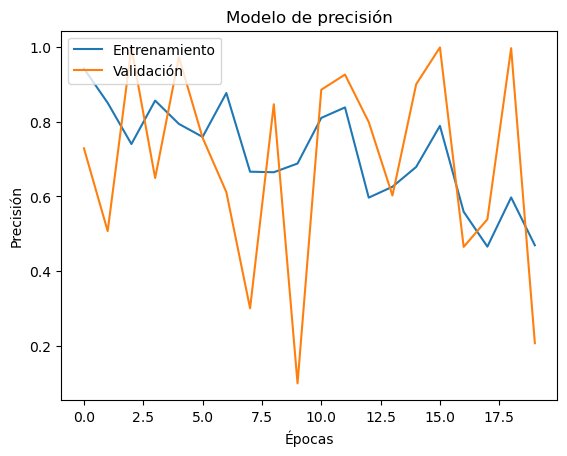

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Cargar datos y realizar preprocesamiento aquí

# Cargar el conjunto de datos de entrenamiento
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])  # Reemplaza 'target_column' con el nombre real de la columna objetivo
y = variaciones_final['etiqueta']  # Reemplaza 'target_column' con el nombre real de la columna objetivo

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con pesos de clase
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights_dict, validation_split=0.2)

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/2/balanced.h5')

# Opcional: Guardar el historial de entrenamiento para análisis posterior
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.savefig('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/2/historial_entrenamiento.png')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de entrenamiento
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])
y = variaciones_final['etiqueta']

# Convertir etiquetas a formato adecuado (si es necesario)
y = y.values  # Asegúrate de que sea un array de NumPy

# Número de pliegues para la validación cruzada
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Almacenar resultados de validación
val_losses = []
val_accuracies = []

# Validación Cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}/{num_folds}')
    
    # Dividir los datos en entrenamiento y validación para este pliegue
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Crear el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, 
                        epochs=20, 
                        batch_size=32, 
                        validation_data=(X_val, y_val),
                        class_weight={0: 1., 1: 100.},  # Ajustar el peso de las clases si es necesario
                        verbose=0)  # Desactivar la salida detallada del entrenamiento
    
    # Evaluar el modelo en el conjunto de validación
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # Guardar el historial de entrenamiento para el pliegue actual
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Modelo de precisión - Fold {fold + 1}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
    plt.savefig(f'/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/3/historial_entrenamiento_fold_{fold + 1}.png')
    plt.close()

# Imprimir resultados promedio de validación
print(f'Average validation loss: {np.mean(val_losses)}')
print(f'Average validation accuracy: {np.mean(val_accuracies)}')

# Opcional: Guardar el modelo entrenado final
model.save('/home/ec2-user/SageMaker/segundo intento/final2//preprocesado/3/modelo_crossentropy.h5')


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Average validation loss: 0.021343914276803842
Average validation accuracy: 0.9999739646911621


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
3841/3841 [==============================] - 22s 4ms/step - loss: 4.2839 - accuracy: 0.9957 - val_loss: 0.1259 - val_accuracy: 1.0000
Epoch 2/50
3841/3841 [==============================] - 16s 4ms/step - loss: 4.0265 - accuracy: 0.8228 - val_loss: 2.5171 - val_accuracy: 0.3837
Epoch 3/50
3841/3841 [==============================] - 16s 4ms/step - loss: 4.6340 - accuracy: 0.7889 - val_loss: 0.7329 - val_accuracy: 0.5774
Epoch 4/50
3841/3841 [==============================] - 18s 5ms/step - loss: 2.2655 - accuracy: 0.8244 - val_loss: 0.7159 - val_accuracy: 0.5218
Epoch 5/50
3841/3841 [==============================] - 16s 4ms/step - loss: 1.7105 - accuracy: 0.8021 - val_loss: 0.1042 - val_accuracy: 1.0000
Epoch 6/50
3841/3841 [==============================] - 16s 4ms/step - loss: 3.8571 - accuracy: 0.8670 - val_loss: 0.1338 - val_accuracy: 0.9990
Epoch 7/50
3841/3841 [==============================] - 16s 4ms/step - loss: 1.6163 - accuracy: 0.8012 - val_loss: 0.1736 - val_ac

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


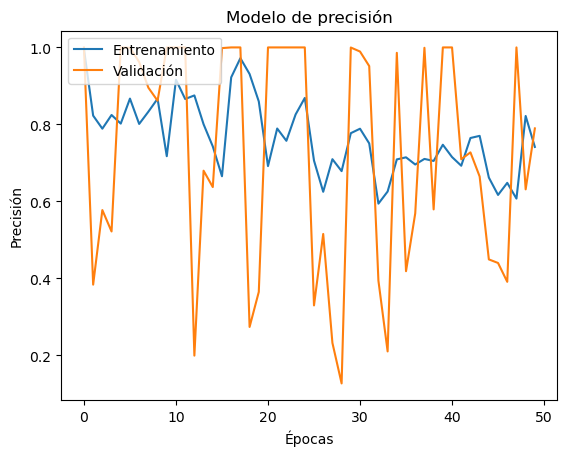

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Cargar el conjunto de datos de entrenamiento
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])
y = variaciones_final['etiqueta']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir y_train a numpy array
y_train = np.array(y_train)

# Calcular los pesos de clase para manejar el desequilibrio
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))  # Capa de entrada
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(BatchNormalization())  # Normalización por lotes
model.add(Dense(256, activation='relu'))  # Capa oculta
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(BatchNormalization())  # Normalización por lotes
model.add(Dense(128, activation='relu'))  # Capa oculta
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste
model.add(BatchNormalization())  # Normalización por lotes
model.add(Dense(64, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida (para clasificación binaria)

# Compilar el modelo
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy',  # Cambia a 'categorical_crossentropy' para clasificación multiclase
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, 
                    epochs=50,  # Número de épocas; ajusta según sea necesario
                    batch_size=64,  # Tamaño del batch; ajusta según sea necesario
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict)  # Manejo del desequilibrio

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/4/modelo_mejorado.h5')

# Opcional: Guardar el historial de entrenamiento para análisis posterior
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.savefig('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/4/historial_entrenamiento_mejorado.png')
plt.show()


Epoch 1/50
3841/3841 [==============================] - 20s 4ms/step - loss: 3.9298 - accuracy: 0.9966 - val_loss: 7.1209e-04 - val_accuracy: 1.0000
Epoch 2/50
3841/3841 [==============================] - 16s 4ms/step - loss: 5.3393 - accuracy: 0.9954 - val_loss: 8.9896e-04 - val_accuracy: 1.0000
Epoch 3/50
3841/3841 [==============================] - 16s 4ms/step - loss: 9.7952 - accuracy: 0.9373 - val_loss: 0.0568 - val_accuracy: 0.9964
Epoch 4/50
3841/3841 [==============================] - 16s 4ms/step - loss: 5.0004 - accuracy: 0.7531 - val_loss: 0.0230 - val_accuracy: 0.9923
Epoch 5/50
3841/3841 [==============================] - 16s 4ms/step - loss: 6.8627 - accuracy: 0.8651 - val_loss: 8.2843e-04 - val_accuracy: 1.0000
Epoch 6/50
3841/3841 [==============================] - 16s 4ms/step - loss: 4.2384 - accuracy: 0.8296 - val_loss: 9.0366e-04 - val_accuracy: 1.0000
Epoch 7/50
3841/3841 [==============================] - 16s 4ms/step - loss: 7.3721 - accuracy: 0.9237 - val_loss:

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


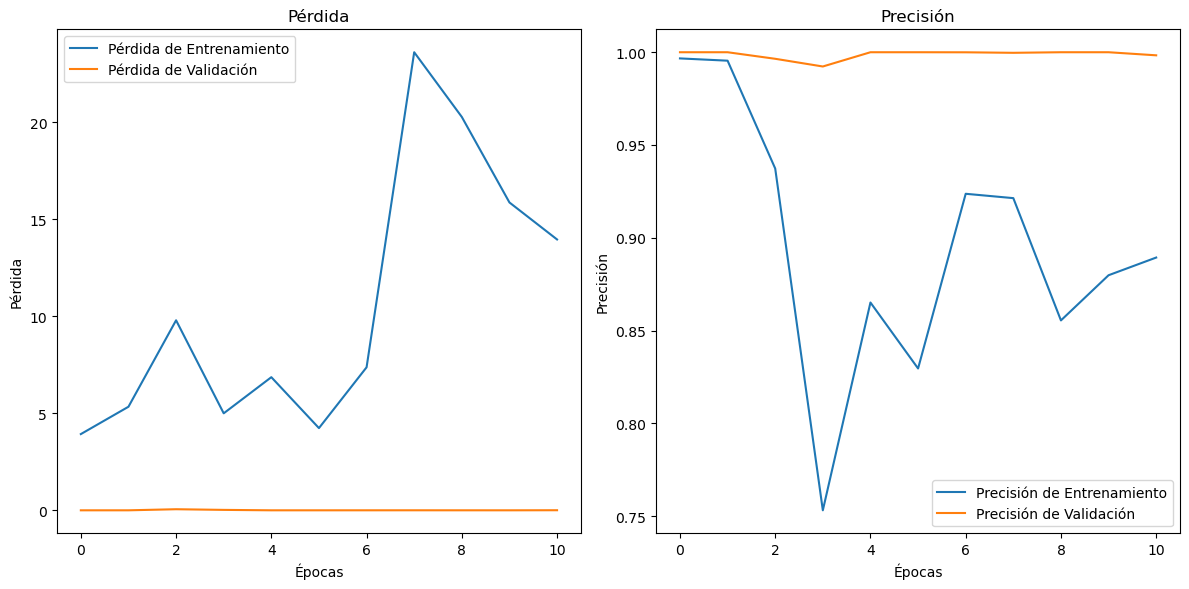

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])  # Reemplaza 'etiqueta' con el nombre real de la columna objetivo
y = variaciones_final['etiqueta']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular los pesos de clase para manejar el desequilibrio
classes = np.array([0, 1])  # Convertir a numpy array
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/5/modelo_entrenado_mejorado.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
3841/3841 [==============================] - 17s 4ms/step - loss: 5.4116 - accuracy: 0.9977 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/50
3841/3841 [==============================] - 14s 4ms/step - loss: 3.2645 - accuracy: 0.8926 - val_loss: 0.0180 - val_accuracy: 0.9888
Epoch 3/50
3841/3841 [==============================] - 14s 4ms/step - loss: 3.2398 - accuracy: 0.8514 - val_loss: 0.7367 - val_accuracy: 0.8161
Epoch 4/50
3841/3841 [==============================] - 14s 4ms/step - loss: 3.9308 - accuracy: 0.7909 - val_loss: 1.6185 - val_accuracy: 0.6823
Epoch 5/50
3841/3841 [==============================] - 14s 4ms/step - loss: 2.8431 - accuracy: 0.8682 - val_loss: 7.0521e-04 - val_accuracy: 1.0000
Epoch 6/50
3841/3841 [==============================] - 14s 4ms/step - loss: 7.0225 - accuracy: 0.8486 - val_loss: 0.1672 - val_accuracy: 0.9371
Epoch 7/50
3841/3841 [==============================] - 14s 4ms/step - loss: 3.6521 - accuracy: 0.8240 - val_loss: 0.1807 - va

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


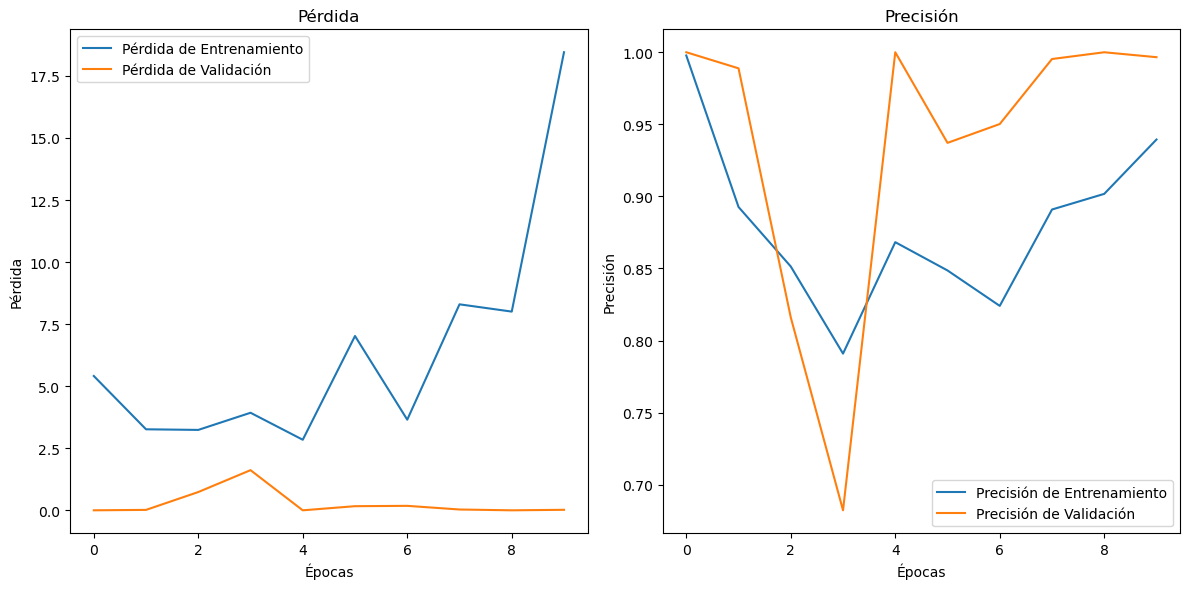

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])  # Reemplaza 'etiqueta' con el nombre real de la columna objetivo
y = variaciones_final['etiqueta']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular los pesos de clase para manejar el desequilibrio
classes = np.array([0, 1])  # Convertir a numpy array
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Crear el modelo
model = Sequential()

# Añadir capas
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/6/modelo_entrenado_mejorado.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
3841/3841 [==============================] - 32s 7ms/step - loss: 5.0005 - accuracy: 0.9821 - val_loss: 0.0368 - val_accuracy: 0.9981
Epoch 2/50
3841/3841 [==============================] - 27s 7ms/step - loss: 3.8091 - accuracy: 0.8505 - val_loss: 0.1688 - val_accuracy: 0.9163
Epoch 3/50
3841/3841 [==============================] - 27s 7ms/step - loss: 1.2622 - accuracy: 0.8263 - val_loss: 0.0594 - val_accuracy: 1.0000
Epoch 4/50
3841/3841 [==============================] - 27s 7ms/step - loss: 1.4313 - accuracy: 0.8138 - val_loss: 0.1852 - val_accuracy: 0.8991
Epoch 5/50
3841/3841 [==============================] - 28s 7ms/step - loss: 2.0566 - accuracy: 0.7661 - val_loss: 0.5212 - val_accuracy: 0.7500
Epoch 6/50
3841/3841 [==============================] - 27s 7ms/step - loss: 1.4344 - accuracy: 0.7603 - val_loss: 0.6537 - val_accuracy: 0.7216
Epoch 7/50
3841/3841 [==============================] - 27s 7ms/step - loss: 3.1719 - accuracy: 0.7338 - val_loss: 0.9483 - val_ac

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


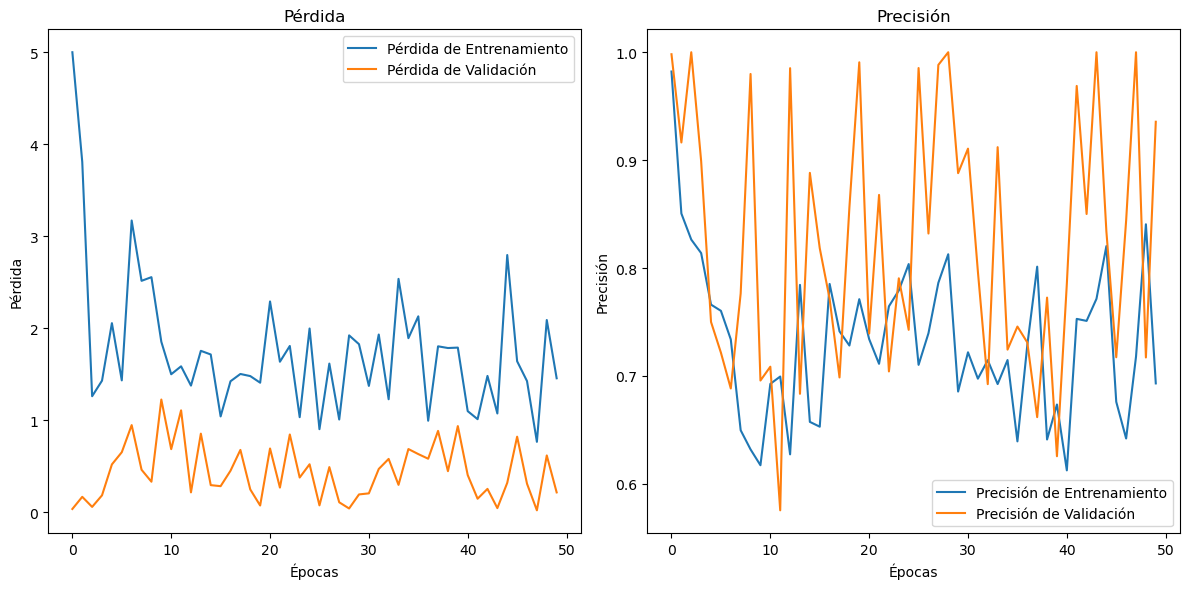

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])  # Reemplaza 'etiqueta' con el nombre real de la columna objetivo
y = variaciones_final['etiqueta']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular los pesos de clase para manejar el desequilibrio
classes = np.array([0, 1])  # Convertir a numpy array
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Redimensionar los datos para que puedan ser procesados por una CNN
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)

# Crear el modelo
model = Sequential()

# Añadir capas convolucionales con normalización por lotes
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Quitar MaxPooling1D aquí para evitar reducir demasiado las dimensiones

# Añadir capas densas con normalización por lotes
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict
                   )

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/7/modelo_entrenado_cnn.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


2024-07-25 12:13:37.206128: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 12:13:37.262368: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-25 12:13:38.198329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-25 12:13:41.087250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://g

Epoch 1/50


2024-07-25 12:13:59.838846: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721909641.617608   17808 service.cc:145] XLA service 0x7f91e04090e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721909641.617646   17808 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-07-25 12:14:01.624261: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1721909641.694629   17808 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15364/15364 [==============================] - 127s 7ms/step - loss: 0.4703 - accuracy: 0.7285 - val_loss: 0.5372 - val_accuracy: 0.8048
Epoch 2/50
15364/15364 [==============================] - 105s 7ms/step - loss: 0.3657 - accuracy: 0.8030 - val_loss: 0.6699 - val_accuracy: 0.7991
Epoch 3/50
15364/15364 [==============================] - 108s 7ms/step - loss: 0.3449 - accuracy: 0.8147 - val_loss: 0.5844 - val_accuracy: 0.8124
Epoch 4/50
15364/15364 [==============================] - 107s 7ms/step - loss: 0.3354 - accuracy: 0.8203 - val_loss: 0.6799 - val_accuracy: 0.7985
Epoch 5/50
15364/15364 [==============================] - 106s 7ms/step - loss: 0.3295 - accuracy: 0.8233 - val_loss: 0.5901 - val_accuracy: 0.7958
Epoch 6/50
15364/15364 [==============================] - 105s 7ms/step - loss: 0.3263 - accuracy: 0.8248 - val_loss: 0.5637 - val_accuracy: 0.7776
Epoch 7/50
15364/15364 [==============================] - 103s 7ms/step - loss: 0.3233 - accuracy: 0.8260 - val_loss: 0.487

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


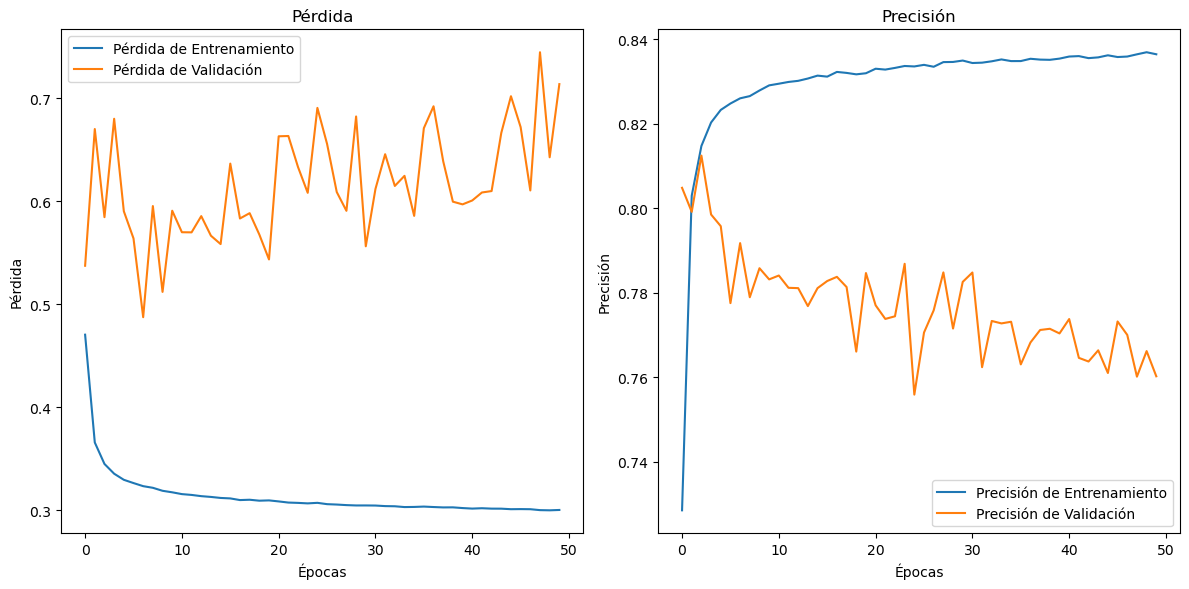

In [1]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd

variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])
y = variaciones_final['etiqueta']

# Aplicar SMOTE para aumentar la clase minoritaria
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Añadir ruido a los datos aumentados
def add_noise(X, noise_factor=0.05):
    noise = np.random.randn(*X.shape) * noise_factor
    X_noisy = X + noise
    X_noisy = np.clip(X_noisy, 0., 1.)  # Asegurarse de que los valores estén en el mismo rango que los datos originales
    return X_noisy

X_res_noisy = add_noise(X_res, noise_factor=0.05)

# Concatenar los datos originales y los aumentados
X_final = np.concatenate([X_res, X_res_noisy])
y_final = np.concatenate([y_res, y_res])

# Dividir el conjunto de datos aumentado en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Redimensionar los datos para que puedan ser procesados por una CNN
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_res), y=y_res)
class_weights_dict = dict(enumerate(class_weights))

# Crear el modelo
model = Sequential()

# Añadir capas convolucionales con normalización por lotes
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Quitar MaxPooling1D aquí para evitar reducir demasiado las dimensiones

# Añadir capas densas con normalización por lotes
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict
                   )

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/8/modelo_entrenado_cnn.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
15334/15334 [==============================] - 110s 7ms/step - loss: 0.2311 - accuracy: 0.7346 - val_loss: 0.1400 - val_accuracy: 0.7993
Epoch 2/50
15334/15334 [==============================] - 105s 7ms/step - loss: 0.1011 - accuracy: 0.8096 - val_loss: 0.1747 - val_accuracy: 0.8096
Epoch 3/50
15334/15334 [==============================] - 105s 7ms/step - loss: 0.0943 - accuracy: 0.8197 - val_loss: 0.1616 - val_accuracy: 0.8096
Epoch 4/50
15334/15334 [==============================] - 104s 7ms/step - loss: 0.0907 - accuracy: 0.8243 - val_loss: 0.1474 - val_accuracy: 0.8165
Epoch 5/50
15334/15334 [==============================] - 105s 7ms/step - loss: 0.0888 - accuracy: 0.8277 - val_loss: 0.1708 - val_accuracy: 0.7997
Epoch 6/50
7667/7667 [==============================] - 16s 2ms/step - loss: 0.1400 - accuracy: 0.7993
Validation loss: 0.14004449546337128
Validation accuracy: 0.7993103265762329


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


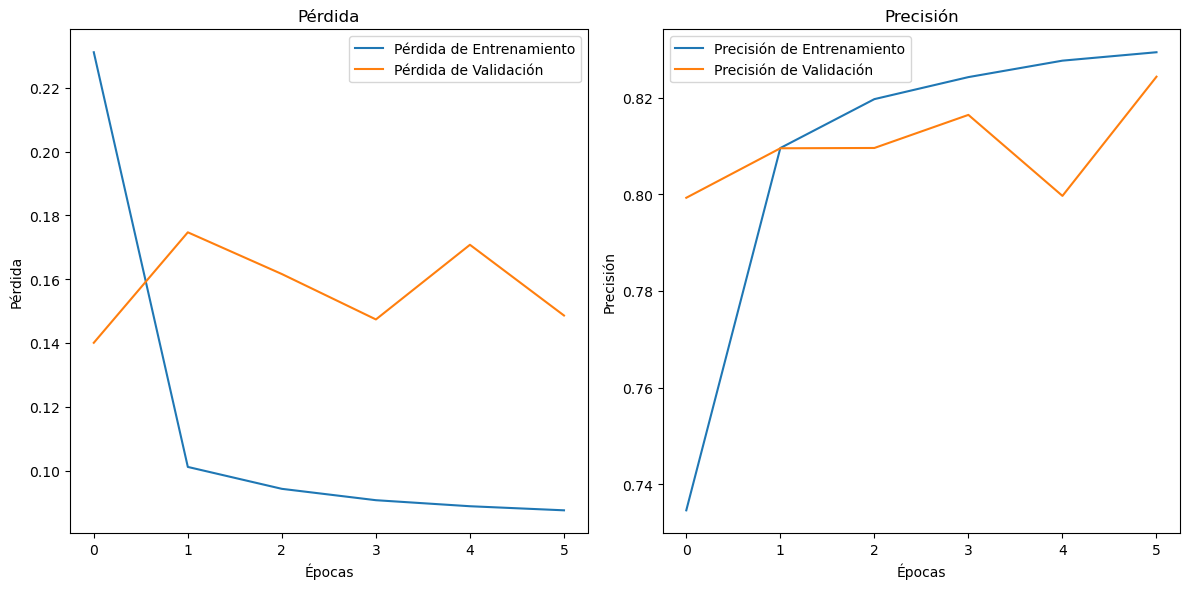

In [12]:
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import BinaryFocalCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold

# Aplicar SMOTETomek para combinar sobremuestreo con limpieza de ruido
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

# Añadir ruido a los datos aumentados
def add_noise(X, noise_factor=0.05):
    noise = np.random.randn(*X.shape) * noise_factor
    X_noisy = X + noise
    X_noisy = np.clip(X_noisy, 0., 1.)
    return X_noisy

X_res_noisy = add_noise(X_res, noise_factor=0.05)

# Concatenar los datos originales y los aumentados
X_final = np.concatenate([X_res, X_res_noisy])
y_final = np.concatenate([y_res, y_res])

# Dividir el conjunto de datos aumentado en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Redimensionar los datos para que puedan ser procesados por una CNN
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_res), y=y_res)
class_weights_dict = dict(enumerate(class_weights))

# Crear el modelo
model = Sequential()

# Añadir capas convolucionales con normalización por lotes
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Añadir capas densas con normalización por lotes y regularización L2
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss=BinaryFocalCrossentropy(gamma=2.0),
              metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/9/modelo_entrenado_cnn.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
15334/15334 [==============================] - 104s 7ms/step - loss: 0.4189 - accuracy: 0.7746 - val_loss: 0.6401 - val_accuracy: 0.8053 - lr: 5.0000e-04
Epoch 2/50
15334/15334 [==============================] - 102s 7ms/step - loss: 0.3239 - accuracy: 0.8317 - val_loss: 0.7485 - val_accuracy: 0.8019 - lr: 5.0000e-04
Epoch 3/50
15334/15334 [==============================] - 100s 7ms/step - loss: 0.3036 - accuracy: 0.8427 - val_loss: 0.6964 - val_accuracy: 0.8048 - lr: 5.0000e-04
Epoch 4/50
15334/15334 [==============================] - 100s 7ms/step - loss: 0.2945 - accuracy: 0.8468 - val_loss: 0.5316 - val_accuracy: 0.8150 - lr: 5.0000e-04
Epoch 5/50
15334/15334 [==============================] - 103s 7ms/step - loss: 0.2890 - accuracy: 0.8479 - val_loss: 0.6126 - val_accuracy: 0.8194 - lr: 5.0000e-04
Epoch 6/50
15334/15334 [==============================] - 100s 7ms/step - loss: 0.2839 - accuracy: 0.8518 - val_loss: 0.7143 - val_accuracy: 0.8032 - lr: 5.0000e-04
Epoch 7/50

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


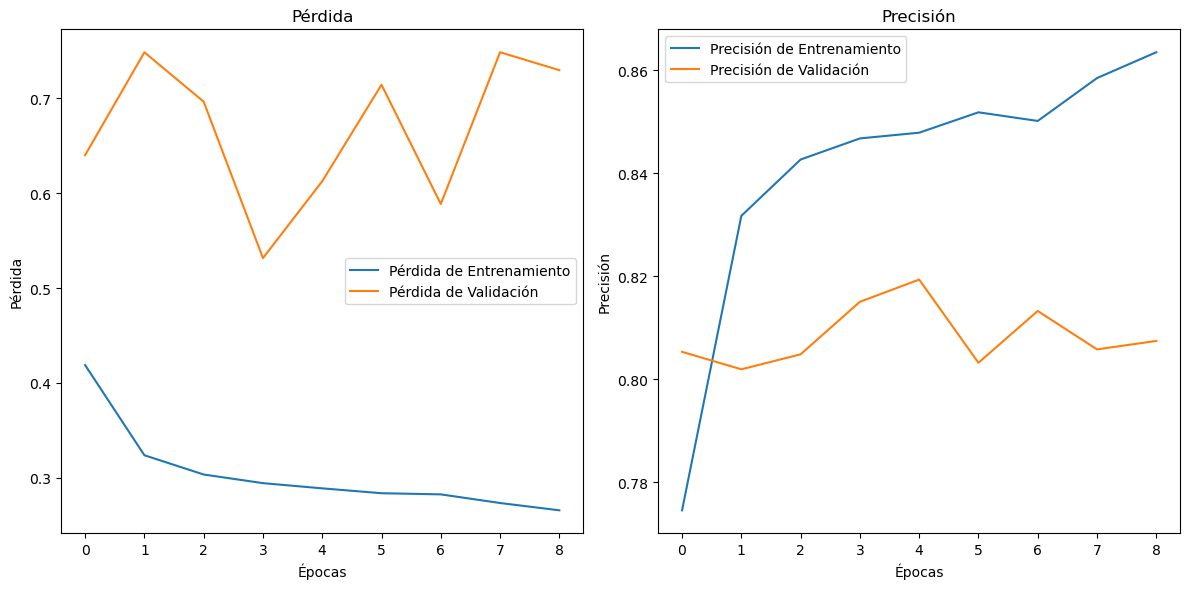

In [11]:
from imblearn.combine import SMOTETomek
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd


# Cargar los datos
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])
y = variaciones_final['etiqueta']

# Aplicar SMOTETomek para combinar sobremuestreo con limpieza de ruido
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

# Añadir ruido a los datos aumentados
def add_noise(X, noise_factor=0.05):
    noise = np.random.randn(*X.shape) * noise_factor
    X_noisy = X + noise
    X_noisy = np.clip(X_noisy, 0., 1.)  # Asegurarse de que los valores estén en el mismo rango que los datos originales
    return X_noisy

X_res_noisy = add_noise(X_res, noise_factor=0.05)

# Concatenar los datos originales y los aumentados
X_final = np.concatenate([X_res, X_res_noisy])
y_final = np.concatenate([y_res, y_res])

# Dividir el conjunto de datos aumentado en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Redimensionar los datos para que puedan ser procesados por una CNN
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_res), y=y_res)
class_weights_dict = dict(enumerate(class_weights))

# Crear el modelo
model = Sequential()

# Añadir capas convolucionales con normalización por lotes
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Cambiar a GlobalAveragePooling1D para reducir dimensiones
model.add(Conv1D(256, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GlobalAveragePooling1D())

# Añadir capas densas con normalización por lotes
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)  # Tasa de aprendizaje ajustada
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/9/modelo_entrenado_cnn_mejorado.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
15334/15334 [==============================] - 112s 7ms/step - loss: 0.6196 - accuracy: 0.7005 - val_loss: 0.4533 - val_accuracy: 0.7386 - lr: 5.0000e-04
Epoch 2/50
15334/15334 [==============================] - 107s 7ms/step - loss: 0.4075 - accuracy: 0.7899 - val_loss: 0.4586 - val_accuracy: 0.8209 - lr: 5.0000e-04
Epoch 3/50
15334/15334 [==============================] - 105s 7ms/step - loss: 0.3770 - accuracy: 0.7992 - val_loss: 0.4718 - val_accuracy: 0.8249 - lr: 5.0000e-04
Epoch 4/50
15334/15334 [==============================] - 106s 7ms/step - loss: 0.3589 - accuracy: 0.8084 - val_loss: 0.5499 - val_accuracy: 0.8288 - lr: 5.0000e-04
Epoch 5/50
15334/15334 [==============================] - 106s 7ms/step - loss: 0.3412 - accuracy: 0.8145 - val_loss: 0.5344 - val_accuracy: 0.8313 - lr: 2.5000e-04
Epoch 6/50
7667/7667 [==============================] - 15s 2ms/step - loss: 0.4533 - accuracy: 0.7386
Validation loss: 0.45329898595809937
Validation accuracy: 0.738554835319

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


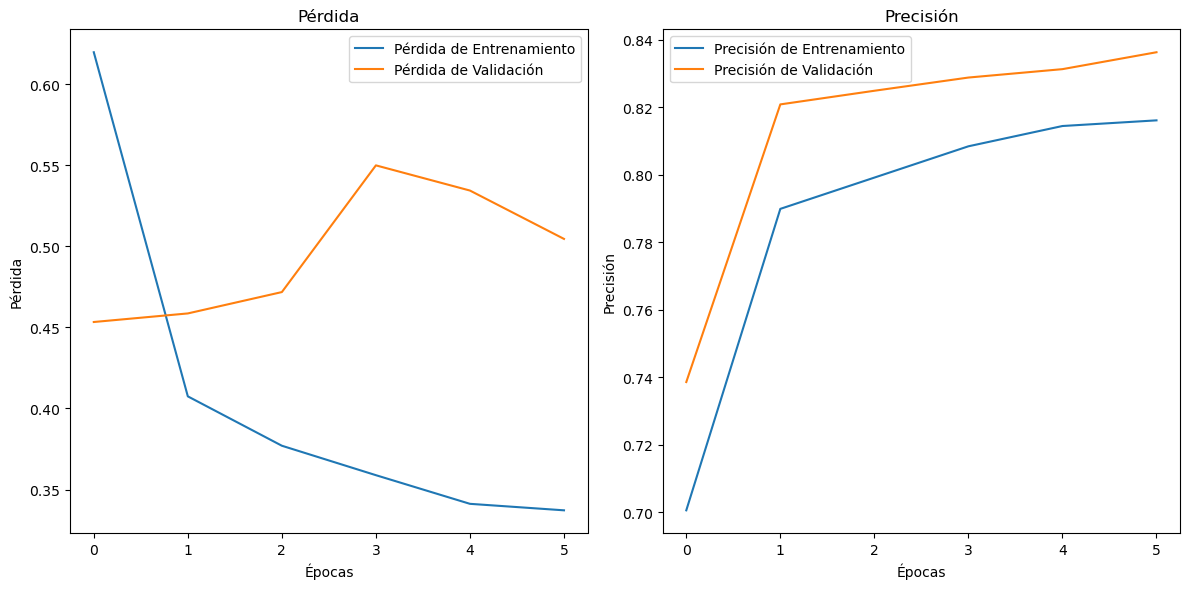

In [14]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from imblearn.combine import SMOTETomek


# Cargar los datos
variaciones_final = pd.read_csv('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/variaciones_con_etiqueta.csv')

# Separar características y etiquetas
X = variaciones_final.drop(columns=['etiqueta'])
y = variaciones_final['etiqueta']

# Aplicar SMOTETomek para combinar sobremuestreo con limpieza de ruido
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

# Añadir ruido a los datos aumentados
def add_noise(X, noise_factor=0.05):
    noise = np.random.randn(*X.shape) * noise_factor
    X_noisy = X + noise
    X_noisy = np.clip(X_noisy, 0., 1.)  # Asegurarse de que los valores estén en el mismo rango que los datos originales
    return X_noisy

X_res_noisy = add_noise(X_res, noise_factor=0.05)

# Concatenar los datos originales y los aumentados
X_final = np.concatenate([X_res, X_res_noisy])
y_final = np.concatenate([y_res, y_res])

# Dividir el conjunto de datos aumentado en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Redimensionar los datos para que puedan ser procesados por una CNN
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_res), y=y_res)
class_weights_dict = dict(enumerate(class_weights))

# Crear el modelo
model = Sequential()

# Añadir capas convolucionales con padding y normalización por lotes
model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GlobalAveragePooling1D())

# Añadir capas densas con normalización por lotes
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)  # Tasa de aprendizaje ajustada
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Configurar Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

# Guardar el modelo entrenado
model.save('/home/ec2-user/SageMaker/segundo intento/final2/preprocesado/9/modelo_entrenado_cnn_mejorado_v2.h5')

# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
